In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
frequency_domain_features_train = pd.read_csv("frequency_domain_features_train.csv")
heart_rate_non_linear_features_train = pd.read_csv("heart_rate_non_linear_features_train.csv")
time_domain_features_train = pd.read_csv("time_domain_features_train.csv")

In [3]:
frequency_domain_features_train.shape

(369289, 12)

In [4]:
heart_rate_non_linear_features_train.shape

(369289, 7)

In [5]:
time_domain_features_train.shape

(369289, 20)

In [6]:
frequency_domain_features_train.head(5)

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [7]:
heart_rate_non_linear_features_train.head(5)

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [8]:
time_domain_features_train.head(5)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [7]:
df = time_domain_features_train.copy()
df = df.merge(heart_rate_non_linear_features_train, on='uuid',)
df = df.merge(frequency_domain_features_train, on='uuid',)

## EDA

In [10]:
df.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,...,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000
mean,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,0.523235,...,64.289242,946.530252,34.095182,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,0.048506
std,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,1.790348,...,16.774844,574.171780,16.040290,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,0.049238
min,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,-1.894820,...,19.031219,90.048557,2.165119,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128
25%,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,-0.352783,...,52.909877,545.449386,22.305936,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,0.012433
50%,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,0.040736,...,66.350237,782.716291,32.047025,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,0.034735
75%,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,0.722833,...,76.825032,1201.432256,44.647115,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,0.067854
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,64.088107,...,97.738848,3291.548112,77.928847,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,0.431043


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [13]:
len(df.columns)

37

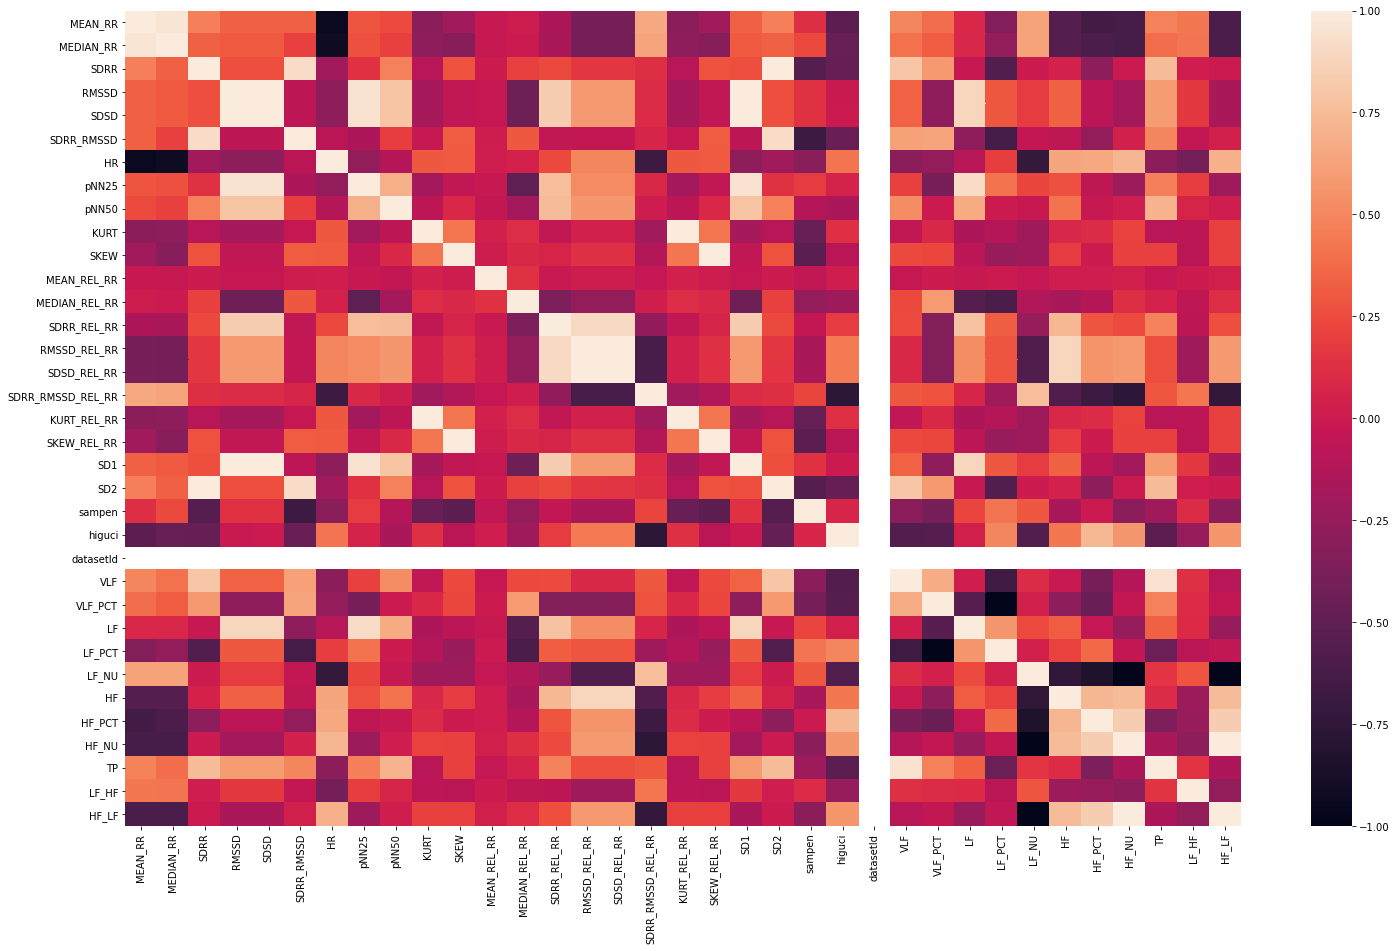

In [45]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr())

In [54]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    try:
        abs_val = abs(s)
        if abs_val >= 0.95:
            return 'background-color: yellow'
        else:
            is_max = False
            return ''
    except:
        is_max = False
    return ''
    #return ['background-color: yellow' if v else '' for v in is_max]
df.corr().style.applymap(highlight_max)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
MEAN_RR,1.000000,0.960949,0.462882,0.333046,0.332950,0.332924,-0.944552,0.286793,0.245215,-0.292933,-0.197770,-0.016858,0.009506,-0.142334,-0.396832,-0.396833,0.654578,-0.292933,-0.197770,0.332950,0.462577,0.122610,-0.516444,nan,0.499427,0.388775,0.079001,-0.335932,0.631864,-0.550557,-0.643472,-0.631864,0.482112,0.435019,-0.606072
MEDIAN_RR,0.960949,1.000000,0.333753,0.309061,0.309021,0.203815,-0.929640,0.270630,0.196992,-0.284508,-0.317130,-0.018019,-0.006349,-0.157426,-0.401170,-0.401170,0.635819,-0.284508,-0.317130,0.309021,0.333450,0.235890,-0.461297,nan,0.399023,0.313607,0.084147,-0.262426,0.627497,-0.550244,-0.596973,-0.627497,0.388862,0.421338,-0.602190
SDRR,0.462882,0.333753,1.000000,0.262933,0.262610,0.914952,-0.202327,0.136393,0.473307,-0.096440,0.276610,0.000217,0.196399,0.236845,0.157551,0.157551,0.119951,-0.096440,0.276610,0.262610,0.999997,-0.549505,-0.473624,nan,0.798173,0.579652,-0.018551,-0.575309,0.003269,0.049095,-0.281334,-0.003269,0.749198,0.016527,-0.000024
RMSSD,0.333046,0.309061,0.262933,1.000000,1.000000,-0.067463,-0.284871,0.951750,0.794846,-0.178586,-0.053997,-0.024209,-0.437706,0.836688,0.583895,0.583894,0.102232,-0.178586,-0.053997,1.000000,0.260933,0.134697,-0.007870,nan,0.341457,-0.278834,0.886955,0.299521,0.185242,0.332323,-0.072118,-0.185242,0.595021,0.170218,-0.163887
SDSD,0.332950,0.309021,0.262610,1.000000,1.000000,-0.067835,-0.284863,0.951771,0.794774,-0.178621,-0.054125,-0.024228,-0.437774,0.836678,0.583878,0.583877,0.102240,-0.178621,-0.054125,1.000000,0.260609,0.134970,-0.007754,nan,0.341293,-0.278996,0.887012,0.299684,0.185263,0.332324,-0.072056,-0.185263,0.594883,0.170234,-0.163904
SDRR_RMSSD,0.332924,0.203815,0.914952,-0.067463,-0.067835,1.000000,-0.084332,-0.145871,0.187629,-0.029829,0.313448,0.014103,0.300669,-0.048227,-0.041412,-0.041412,0.078020,-0.029829,0.313448,-0.067835,0.915475,-0.680969,-0.455149,nan,0.617610,0.637485,-0.276739,-0.637903,-0.041196,-0.062388,-0.262097,0.041196,0.499011,-0.040053,0.036832
HR,-0.944552,-0.929640,-0.202327,-0.284871,-0.284863,-0.084332,1.000000,-0.262903,-0.114896,0.303671,0.306402,0.017776,0.054649,0.234557,0.499867,0.499867,-0.675554,0.303671,0.306402,-0.284863,-0.202003,-0.307587,0.420932,nan,-0.304568,-0.254543,-0.097228,0.194131,-0.724268,0.647427,0.656421,0.724268,-0.301295,-0.404740,0.701864
pNN25,0.286793,0.270630,0.136393,0.951750,0.951771,-0.145871,-0.262903,1.000000,0.687522,-0.182806,-0.048756,-0.020543,-0.508659,0.760177,0.516020,0.516019,0.090807,-0.182806,-0.048756,0.951771,0.134279,0.182433,0.058202,nan,0.195750,-0.384570,0.915789,0.408985,0.222878,0.265996,-0.061967,-0.222878,0.464497,0.187758,-0.205554
pNN50,0.245215,0.196992,0.473307,0.794846,0.794774,0.187629,-0.114896,0.687522,1.000000,-0.064263,0.088570,-0.039165,-0.190604,0.756253,0.570835,0.570835,0.012339,-0.064263,0.088570,0.794774,0.472028,-0.102221,-0.153064,nan,0.529802,-0.001311,0.670072,0.003415,-0.016865,0.412257,-0.018617,0.016865,0.709980,0.065119,0.030559
KURT,-0.292933,-0.284508,-0.096440,-0.178586,-0.178621,-0.029829,0.303671,-0.182806,-0.064263,1.000000,0.422348,0.045365,0.110422,-0.048772,0.043116,0.043117,-0.199930,1.000000,0.422348,-0.178621,-0.095961,-0.466085,0.132065,nan,-0.050392,0.090900,-0.144318,-0.106355,-0.216003,0.085113,0.102859,0.216003,-0.088653,-0.074650,0.207900


In [ ]:
for col in list(df.columns):
    plt.figure(figsize=(15,10))
    try:
        df.boxplot(col)
        plt.title(col)
        plt.show()
    except:
        pass

## Data preparation

In [12]:
df['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

In [13]:
df_onehotenc = pd.get_dummies(df, columns=['condition'], drop_first=True)

In [14]:
X = df_onehotenc.drop(['HR', 'uuid', 'datasetId'], axis=1)
y = df_onehotenc['HR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Fourth Set

In [15]:
df_onehotenc_dropping =df_onehotenc.copy()
df_onehotenc_dropping = df_onehotenc_dropping.drop(['LF_NU', 'SD1', 'RMSSD_REL_RR', 'RMSSD', 'SD2', 'LF_PCT',  ], axis=1)
df_onehotenc_dropping= df_onehotenc_dropping.drop(['SDSD', 'LF', 'HF' ], axis=1)
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import zscore
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_quad = df_onehotenc_dropping.drop(['HR', 'uuid', 'datasetId'], axis=1)
y_quad = df_onehotenc_dropping['HR']
normed_data = X_quad.apply(zscore)
normed_poly_data = poly.fit_transform(normed_data)
X_train_quad, X_test_quad, y_train_quad, y_test_quad = train_test_split(normed_poly_data, y_quad, test_size=0.30, random_state=1)
#normed_train_data = X_train_quad.apply(zscore)
#normed_test_data = X_test_quad.apply(zscore)
#normed_poly_train_data = poly.fit_transform(normed_train_data)
#normed_poly_test_data = poly.fit_transform(normed_test_data)

## Models

## Unsupervised + LR

In [34]:
#df_onehotenc = pd.get_dummies(df, columns=['condition'], drop_first=True)
from sklearn.cluster import KMeans
df_onehotenc_dropping =df_onehotenc.copy()
df_onehotenc_dropping = df_onehotenc_dropping.drop(['LF_NU', 'SD1', 'RMSSD_REL_RR', 'RMSSD', 'SD2', 'LF_PCT',  ], axis=1)
df_onehotenc_dropping= df_onehotenc_dropping.drop(['SDSD', 'LF', 'HF' ], axis=1)

df_z = df_onehotenc_dropping.drop(['HR', 'uuid', 'datasetId'], axis=1).apply(zscore)
model=KMeans(n_clusters=13, random_state=1)
model.fit(df_z)
print('Kmeans fitted')
class_prediction=model.predict(df_z)
print('Kmeans predicted')
df_onehotenc_dropping['class'] = class_prediction

#X = df_onehotenc_dropping.drop(['HR', 'uuid', 'datasetId'], axis=1)
#y = df_onehotenc_dropping['HR']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


Kmeans fitted
Kmeans predicted


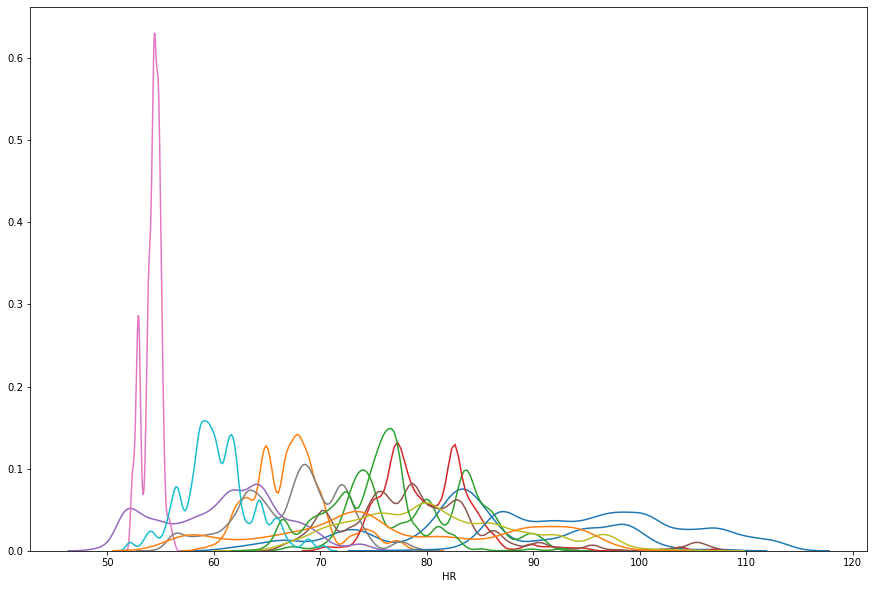

In [35]:
import seaborn as sns
plt.figure(figsize=(15,10))
#df_onehotenc_dropping.boxplot(by="class", patch_artist = True)
#plt.boxplot(df_onehotenc_dropping['HR'], labels=df_onehotenc_dropping['class'])
for i in range(13):
    sns.distplot(df_onehotenc_dropping[df_onehotenc_dropping['class']==i]['HR'], hist=False)

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


0


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(15274,)
0 0.00020519114067941982


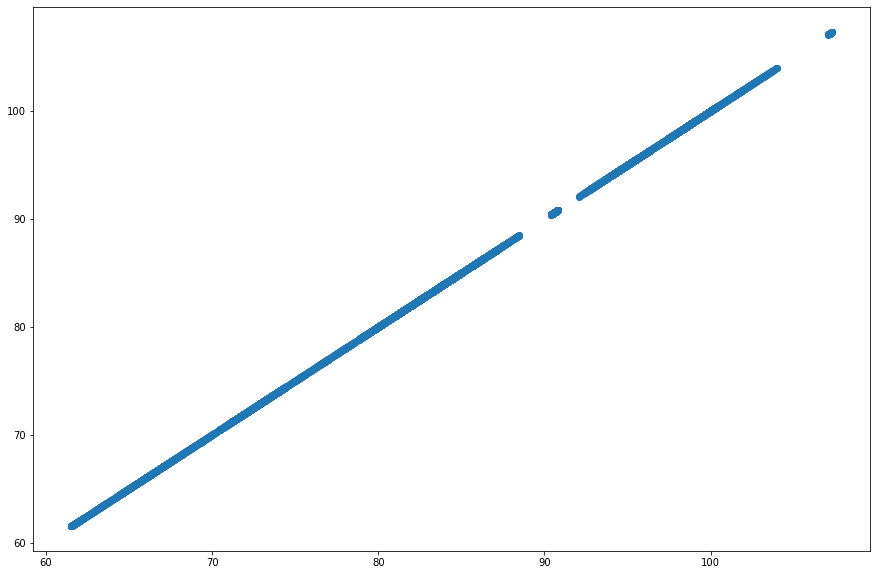

1


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(43843,)
1 0.0002882446335271999


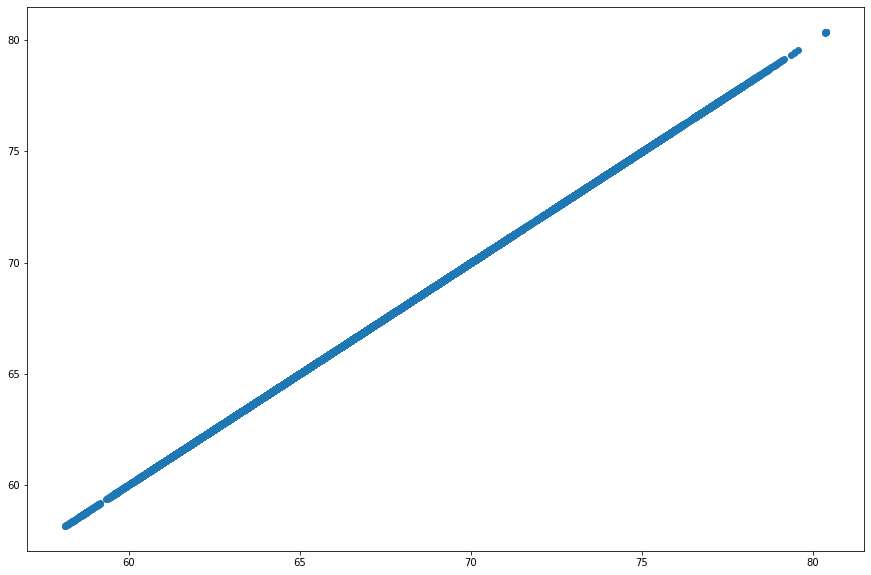

2


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(34564,)
2 7.891078104553353e-05


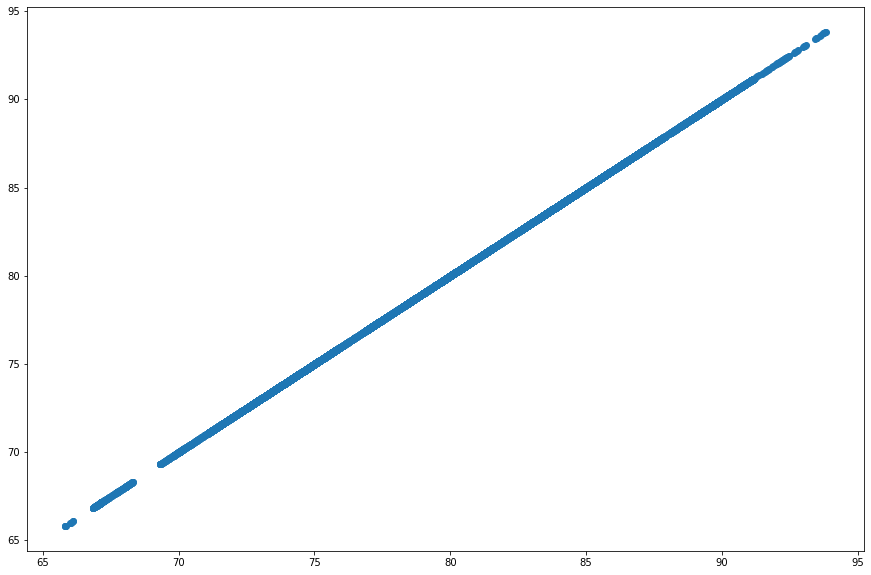

3


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(35522,)
3 0.00015657169642999615


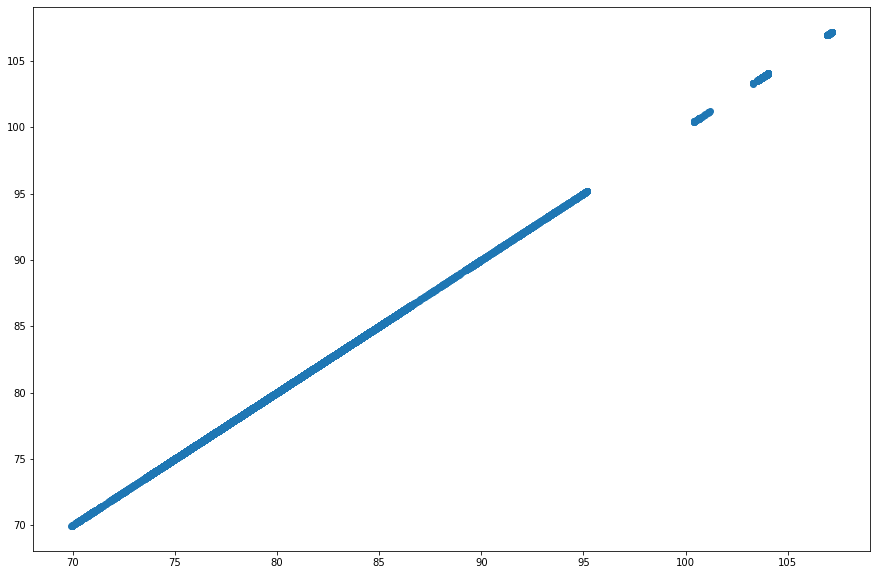

4


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(23342,)
4 0.00150831178359291


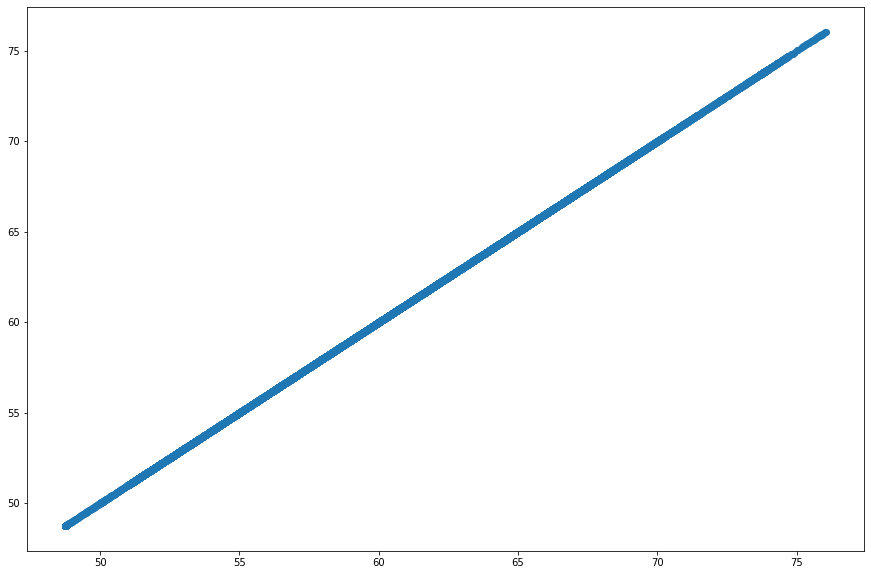

5


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(63270,)
5 0.0005324914385870078


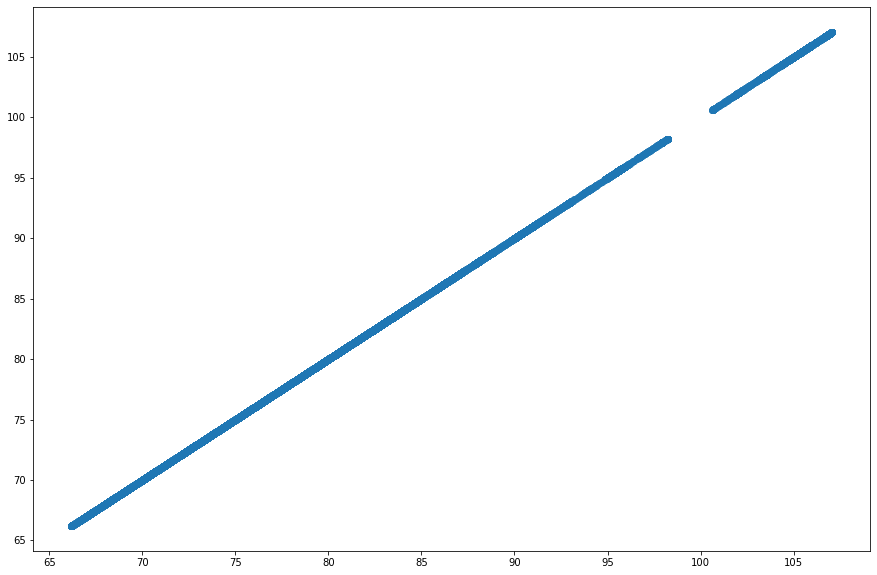

6


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(2758,)
6 4.863838683746921e-07


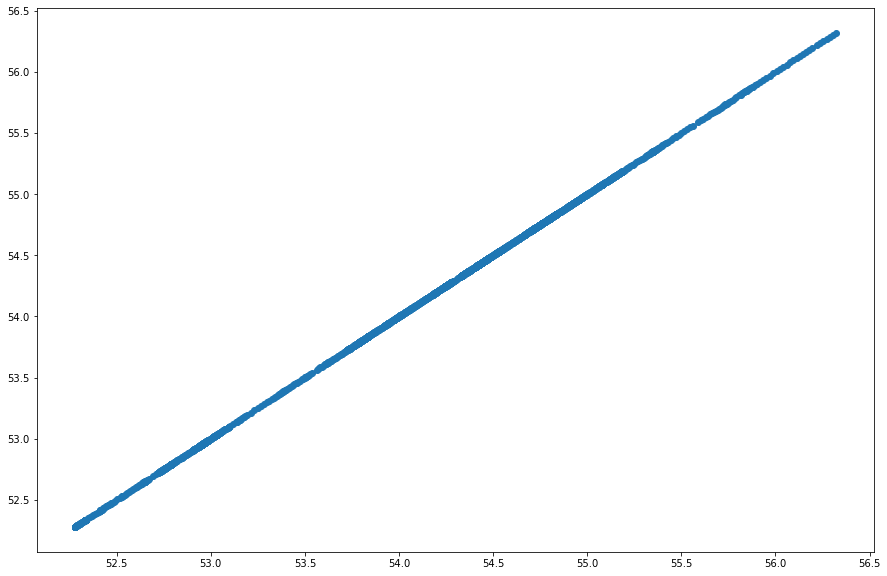

7


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(35119,)
7 0.00030427077127522195


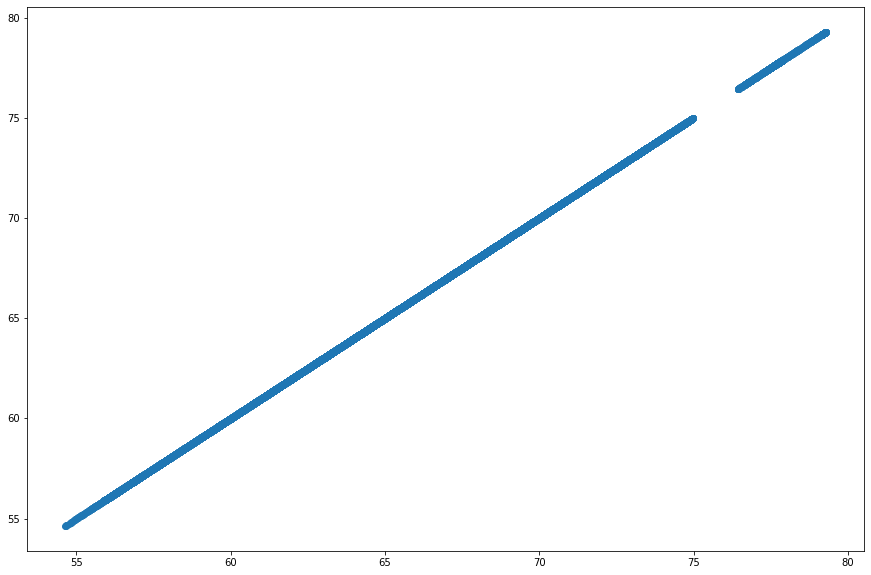

8


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(22550,)
8 0.0018990117762174837


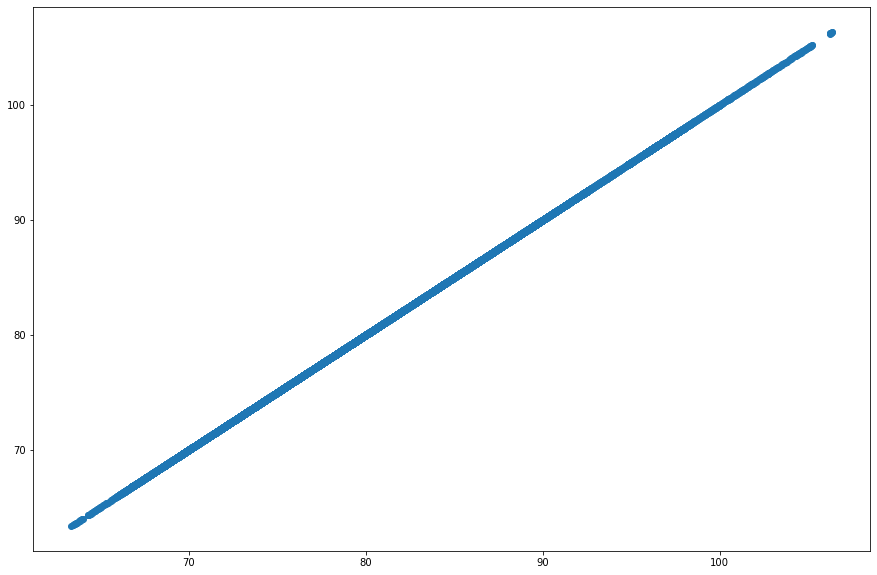

9


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(32182,)
9 0.00014455942078828285


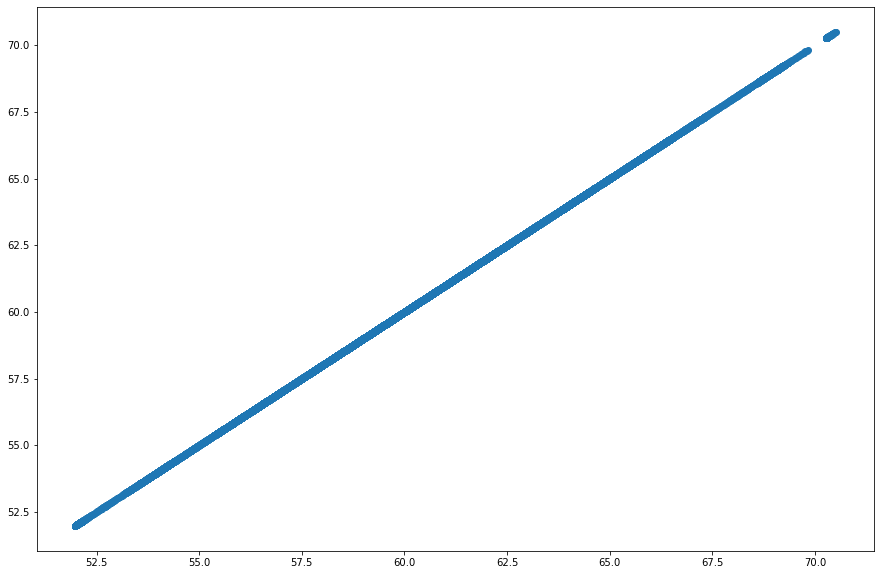

10


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(8896,)
10 0.0001495698395066757


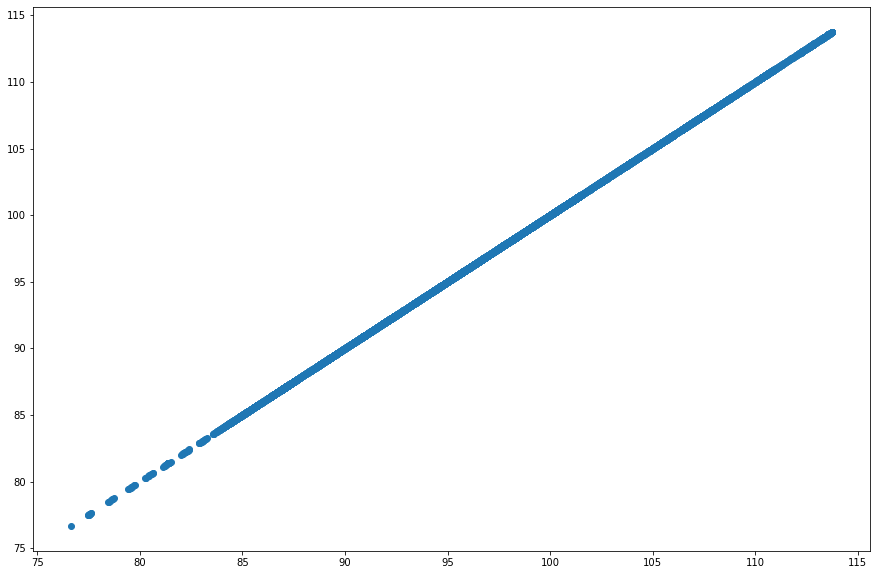

11


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(5635,)
11 0.0001068305781631601


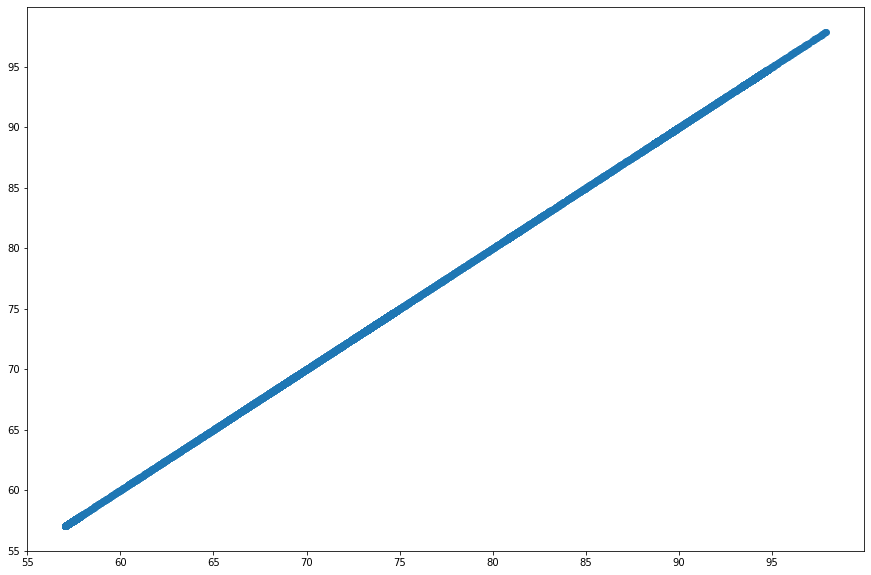

12


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


(46334,)
12 0.000288695979387808


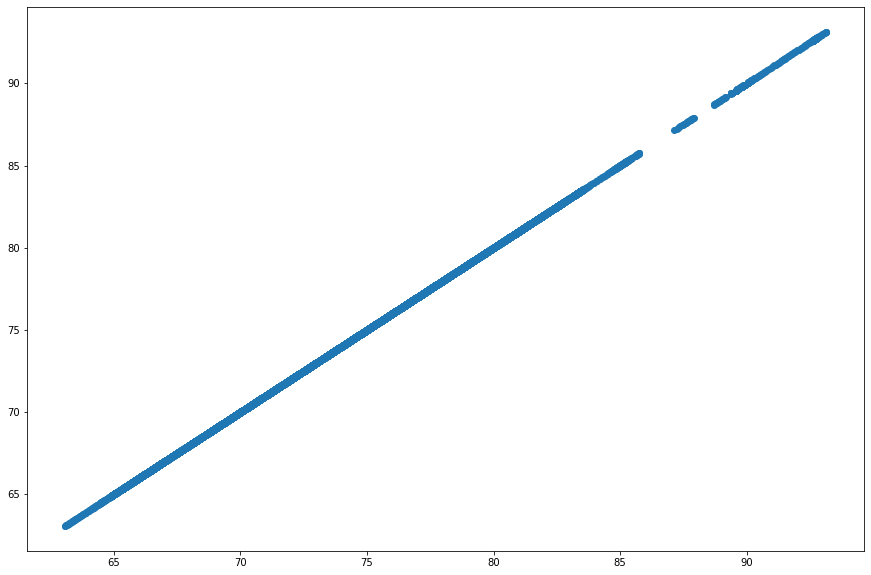

In [37]:
from sklearn.preprocessing import StandardScaler
X_or = df_onehotenc_dropping.drop(['uuid', 'datasetId'], axis=1)
#y = df_onehotenc_dropping[df_onehotenc_dropping['class']==i]['HR']

poly = PolynomialFeatures(degree=3, interaction_only=True)
#X_quad = df_onehotenc_dropping2[df_onehotenc_dropping2['class']==i].drop(['HR', 'uuid', 'datasetId', 'class'], axis=1)
#y_quad = df_onehotenc_dropping2[df_onehotenc_dropping2['class']==i]['HR']
scaler = StandardScaler()
scaler.fit(X_or.drop(['HR', 'class'], axis=1))
#normed_data = scaler.fit_transform(X) #X_quad.apply(zscore)
#X = poly.fit_transform(normed_data)
lr_models2 = []
for i in range(13):
    print(i)
    y = X_or[X_or['class']==i]['HR']
    X = X_or[X_or['class']==i].drop(['HR', 'class'], axis=1)
    
    normed_data = scaler.transform(X) #X_quad.apply(zscore)
    X = poly.fit_transform(normed_data)
    
    #print(X)
    this_model = LinearRegression()
    #this_model = BaggingRegressor(n_estimators=10,random_state=1, n_jobs=6) 
    this_model.fit(X, y)
    lr_models2.append(this_model)
    #mea_train, mea_test = Fitter(lr, normed_poly_train_data, normed_poly_test_data, y_train_quad, y_test_quad)
    print(y.shape)
    y_predict = this_model.predict(X)
    #y_predict_test = lr.predict(X_test_quad)
    mea = mean_absolute_error(y, y_predict)
    #mea_test = mean_absolute_error(y_test_quad, y_predict_test)
    print(i, mea)
    plt.figure(figsize=(15,10))
    plt.scatter(y, y_predict)
    plt.show()

In [40]:
lr_models3 = lr_models2.copy()

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


4 2.2883350636642e-05


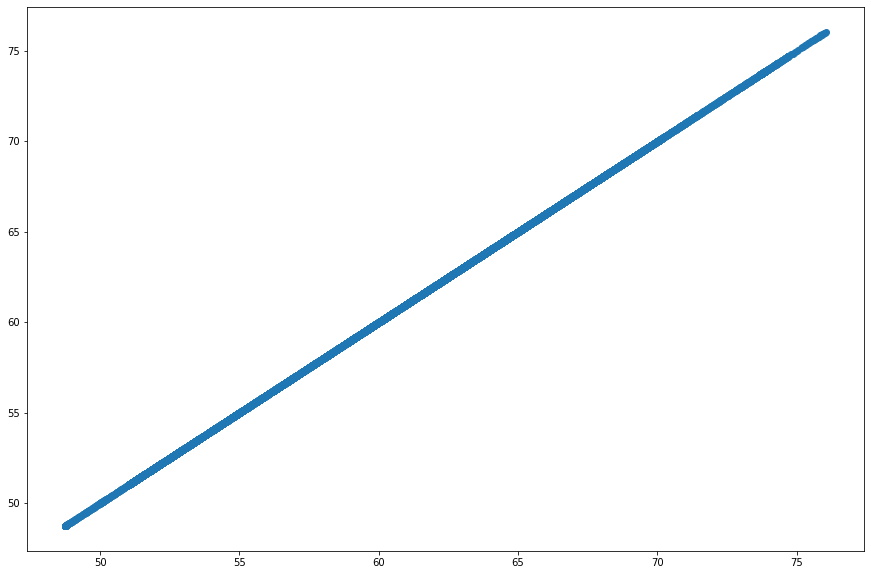

In [42]:
i=4
y_temp = X_or[X_or['class']==i]['HR']
X_temp = X_or[X_or['class']==i].drop(['HR', 'class'], axis=1)
poly = PolynomialFeatures(degree=4, interaction_only=True)
normed_data = scaler.transform(X_temp) #X_quad.apply(zscore)
X_temp = poly.fit_transform(normed_data)

#print(X)
this_model_temp = LinearRegression()
#this_model = BaggingRegressor(n_estimators=10,random_state=1, n_jobs=6) 
this_model_temp.fit(X_temp, y_temp)
#lr_models2.append(this_model_temp)
#mea_train, mea_test = Fitter(lr, normed_poly_train_data, normed_poly_test_data, y_train_quad, y_test_quad)
y_predict = this_model_temp.predict(X_temp)
#y_predict_test = lr.predict(X_test_quad)
mea = mean_absolute_error(y_temp, y_predict)
#mea_test = mean_absolute_error(y_test_quad, y_predict_test)
print(i, mea)
plt.figure(figsize=(15,10))
plt.scatter(y_temp, y_predict)
plt.show()

In [ ]:
i=8
y_temp = X_or[X_or['class']==i]['HR']
X_temp = X_or[X_or['class']==i].drop(['HR', 'class'], axis=1)
poly = PolynomialFeatures(degree=4, interaction_only=True)
normed_data = scaler.transform(X_temp) #X_quad.apply(zscore)
X_temp = poly.fit_transform(normed_data)

#print(X)
this_model_temp_i8 = LinearRegression()
#this_model = BaggingRegressor(n_estimators=10,random_state=1, n_jobs=6) 
this_model_temp_i8.fit(X_temp, y_temp)
#lr_models2.append(this_model_temp)
#mea_train, mea_test = Fitter(lr, normed_poly_train_data, normed_poly_test_data, y_train_quad, y_test_quad)
y_predict = this_model_temp_i8.predict(X_temp)
#y_predict_test = lr.predict(X_test_quad)
mea = mean_absolute_error(y_temp, y_predict)
#mea_test = mean_absolute_error(y_test_quad, y_predict_test)
print(i, mea)
plt.figure(figsize=(15,10))
plt.scatter(y_temp, y_predict)
plt.show()

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


In [47]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                        X_temp:  3.0 GiB
              normed_poly_data: 991.7 MiB
                  X_train_quad: 694.2 MiB
                   X_test_quad: 297.5 MiB
                            df: 158.0 MiB
                  df_onehotenc: 134.9 MiB
                             X: 113.8 MiB
         df_onehotenc_dropping: 110.9 MiB
    time_domain_features_train: 86.3 MiB
                          df_z: 76.1 MiB


In [48]:
del(X_temp)
#del(normed_poly_data)

# Predict on Test data

In [ ]:
frequency_domain_features_test = pd.read_csv(r"../../Test Data/Test Zip/frequency_domain_features_test.csv")
heart_rate_non_linear_features_test = pd.read_csv(r"../../Test Data/Test Zip/heart_rate_non_linear_features_test.csv")
time_domain_features_test = pd.read_csv(r"../../Test Data/Test Zip/time_domain_features_test.csv")

In [ ]:
df_test = time_domain_features_test.copy()
df_test = df_test.merge(heart_rate_non_linear_features_test, on='uuid',)
df_test = df_test.merge(frequency_domain_features_test, on='uuid',)
df_onehotenc_test = pd.get_dummies(df_test, columns=['condition'], drop_first=True)
X_final_test = df_onehotenc_test.drop(['uuid', 'datasetId'], axis=1)

In [ ]:
#Multi step regression with classification using poly LR
df_onehotenc_dropping_final =df_onehotenc_test.copy()
df_onehotenc_dropping_final = df_onehotenc_dropping_final.drop(['LF_NU', 'SD1', 'RMSSD_REL_RR', 'RMSSD', 'SD2', 'LF_PCT',  ], axis=1)
df_onehotenc_dropping_final = df_onehotenc_dropping_final.drop(['SDSD', 'LF', 'HF' ], axis=1)
#X_final_test = df_onehotenc_dropping_final.drop(['uuid', 'datasetId'], axis=1)

In [39]:
df_onehotenc_dropping2_final = df_onehotenc_dropping_final.copy()
df_z_final = df_onehotenc_dropping2_final.drop(['uuid', 'datasetId'], axis=1).apply(zscore)
class_prediction_final=model.predict(df_z_final)
print('Kmeans predicted')
df_onehotenc_dropping2_final['class'] = class_prediction_final
#del(y_predict_final_test)
y_predict_final_test = []
df_results = pd.DataFrame()
df_results['uuid'] = df_onehotenc_test['uuid']
df_results['HR'] = 0
i1 = df_results.set_index('uuid').index

for i in range(13):
    
    i2 = df_onehotenc_dropping2_final[df_onehotenc_dropping2_final['class']==i].set_index('uuid').index
    X = df_onehotenc_dropping2_final[df_onehotenc_dropping2_final['class']==i]
    X = X.drop(['uuid', 'datasetId', 'class'], axis=1)
    poly = PolynomialFeatures(degree=3, interaction_only=True)
    #X_quad = df_onehotenc_dropping2[df_onehotenc_dropping2['class']==i].drop(['HR', 'uuid', 'datasetId', 'class'], axis=1)
    #y_quad = df_onehotenc_dropping2[df_onehotenc_dropping2['class']==i]['HR']
    #scaler = StandardScaler()
    normed_data = scaler.transform(X) #X_quad.apply(zscore)
    X = poly.fit_transform(normed_data)
    #print(df_results[i1.isin(i2)].shape, lr_models2[i].predict(X))
    #df_results[i1.isin(i2)]['HR'] = lr_models2[i].predict(X)
    #print(i1.isin(i2))
    #print(df_results.loc[i1.isin(i2),'HR'])
    df_results.loc[i1.isin(i2),'HR'] = lr_models2[i].predict(X)


#df_results = pd.DataFrame()
#df_results['uuid'] = df_onehotenc_test['uuid']
#df_results['HR'] = y_predict_final_test
df_results.to_csv('Sumbmission_Alana_v17.csv', index=False)

Kmeans predicted


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, float64 were all conve

In [45]:
df_onehotenc_dropping2_final = df_onehotenc_dropping_final.copy()
df_z_final = df_onehotenc_dropping2_final.drop(['uuid', 'datasetId'], axis=1).apply(zscore)
class_prediction_final=model.predict(df_z_final)
print('Kmeans predicted')
df_onehotenc_dropping2_final['class'] = class_prediction_final
#del(y_predict_final_test)
y_predict_final_test = []
df_results = pd.DataFrame()
df_results['uuid'] = df_onehotenc_test['uuid']
df_results['HR'] = 0
i1 = df_results.set_index('uuid').index

for i in range(13):
    
    i2 = df_onehotenc_dropping2_final[df_onehotenc_dropping2_final['class']==i].set_index('uuid').index
    X = df_onehotenc_dropping2_final[df_onehotenc_dropping2_final['class']==i]
    X = X.drop(['uuid', 'datasetId', 'class'], axis=1)
    if i == 4:
        poly = PolynomialFeatures(degree=4, interaction_only=True)
        normed_data = scaler.transform(X) #X_quad.apply(zscore)
        X = poly.fit_transform(normed_data)
        df_results.loc[i1.isin(i2),'HR'] = this_model_temp.predict(X)  
    else:
        poly = PolynomialFeatures(degree=3, interaction_only=True)
        normed_data = scaler.transform(X) #X_quad.apply(zscore)
        X = poly.fit_transform(normed_data)
        df_results.loc[i1.isin(i2),'HR'] = lr_models2[i].predict(X)


#df_results = pd.DataFrame()
#df_results['uuid'] = df_onehotenc_test['uuid']
#df_results['HR'] = y_predict_final_test
df_results.to_csv('Sumbmission_Alana_v19.csv', index=False)

Kmeans predicted


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype uint8, float64 were all conve

In [45]:
df_onehotenc_dropping2_final = df_onehotenc_dropping_final.copy()
df_z_final = df_onehotenc_dropping2_final.drop(['uuid', 'datasetId'], axis=1).apply(zscore)
class_prediction_final=model.predict(df_z_final)
print('Kmeans predicted')
df_onehotenc_dropping2_final['class'] = class_prediction_final
#del(y_predict_final_test)
y_predict_final_test = []
df_results = pd.DataFrame()
df_results['uuid'] = df_onehotenc_test['uuid']
df_results['HR'] = 0
i1 = df_results.set_index('uuid').index

for i in range(13):
    
    i2 = df_onehotenc_dropping2_final[df_onehotenc_dropping2_final['class']==i].set_index('uuid').index
    X = df_onehotenc_dropping2_final[df_onehotenc_dropping2_final['class']==i]
    X = X.drop(['uuid', 'datasetId', 'class'], axis=1)
    if i == 4:
        poly = PolynomialFeatures(degree=4, interaction_only=True)
        normed_data = scaler.transform(X) #X_quad.apply(zscore)
        X = poly.fit_transform(normed_data)
        df_results.loc[i1.isin(i2),'HR'] = this_model_temp.predict(X)  
    elif i == 8:
        poly = PolynomialFeatures(degree=4, interaction_only=True)
        normed_data = scaler.transform(X) #X_quad.apply(zscore)
        X = poly.fit_transform(normed_data)
        df_results.loc[i1.isin(i2),'HR'] = this_model_temp_i8.predict(X)  
    else:
        poly = PolynomialFeatures(degree=3, interaction_only=True)
        normed_data = scaler.transform(X) #X_quad.apply(zscore)
        X = poly.fit_transform(normed_data)
        df_results.loc[i1.isin(i2),'HR'] = lr_models2[i].predict(X)


#df_results = pd.DataFrame()
#df_results['uuid'] = df_onehotenc_test['uuid']
#df_results['HR'] = y_predict_final_test
df_results.to_csv('Sumbmission_Alana_v19.csv', index=False)

Kmeans predicted


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype uint8, float64 were all conve

## Comparison between train and test data

In [10]:
df.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF'],
      dtype='object')

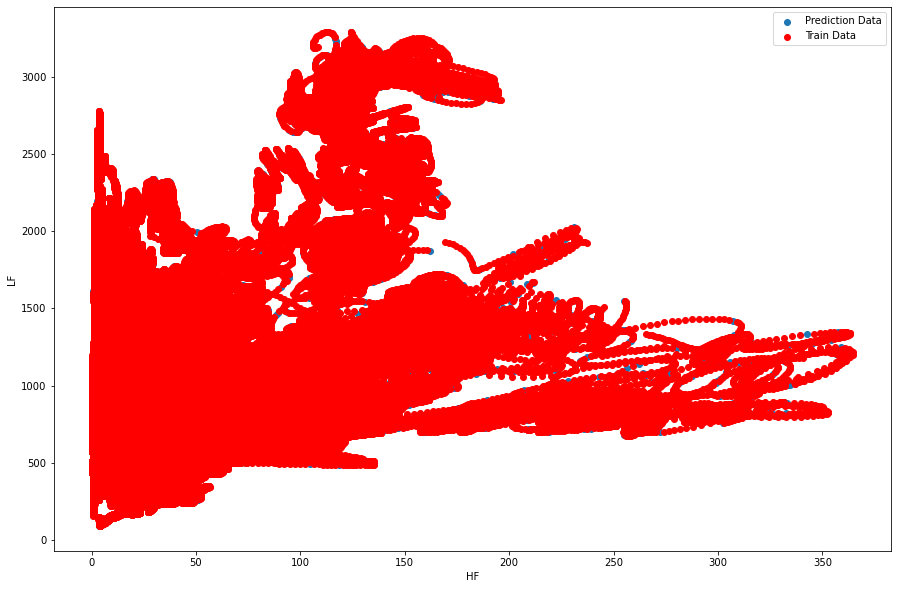

count    328256.000000
mean          0.233490
std           0.404588
min          -0.001026
25%           0.168337
50%           0.187090
75%           0.267420
max           3.609209
Name: HF, dtype: float64
count    328256.000000
mean         -2.321596
std          -3.241762
min          -2.615422
25%           0.760798
50%          -0.736203
75%          -8.844727
max           1.454354
Name: LF, dtype: float64



In [55]:
col1 = 'HF'
col2 = 'LF'
fig, axes = plt.subplots(figsize=(15,10))
plt.xlabel(col1)
plt.ylabel(col2)
plt.scatter(df_test[col1], df_test[col2], label='Prediction Data')
plt.scatter(df[col1], df[col2], color = 'red', label='Train Data')
plt.legend()
plt.show()
print(df[col1].describe()-df_test[col1].describe())
print(df[col2].describe()-df_test[col2].describe())
print('')
#print(df[col2].describe().T)
#print(df_test[col2].describe().T)

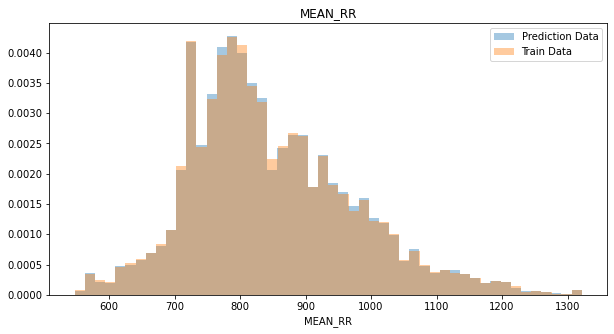

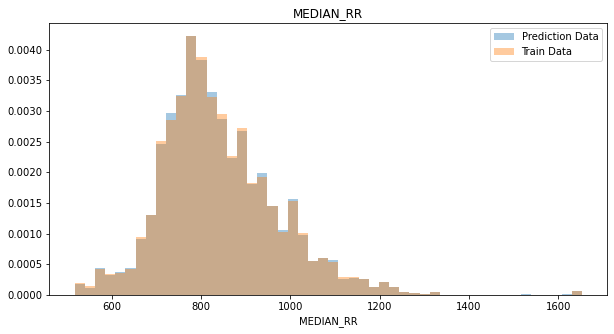

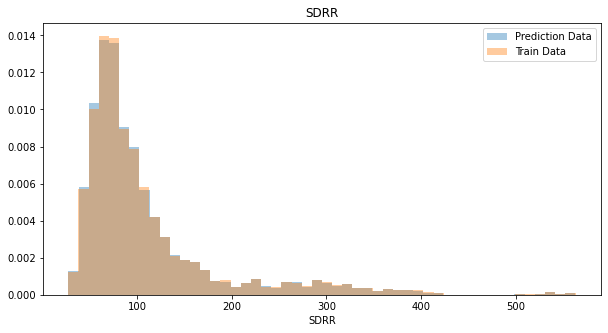

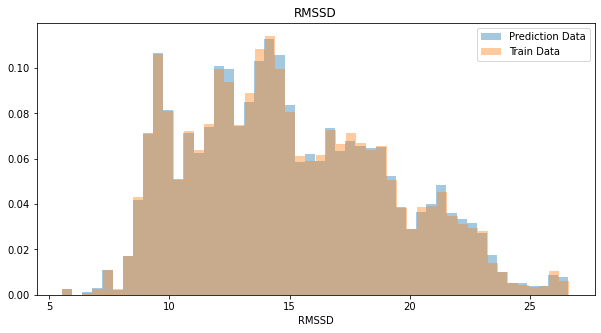

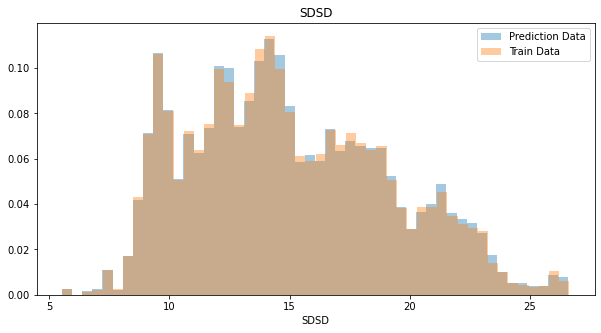

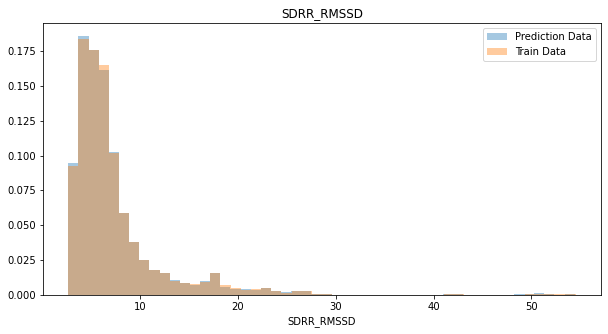

<Figure size 720x360 with 0 Axes>

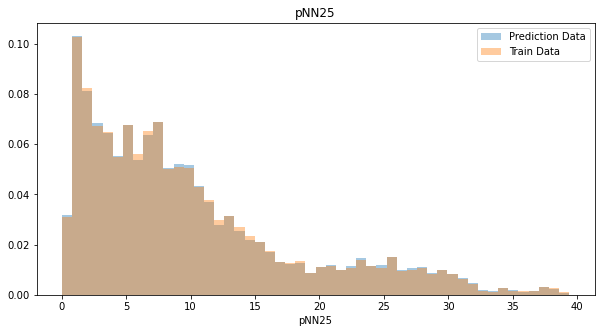

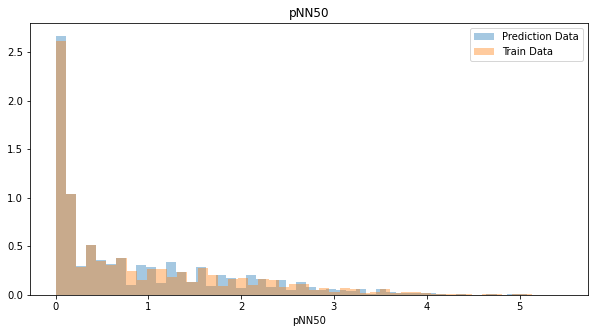

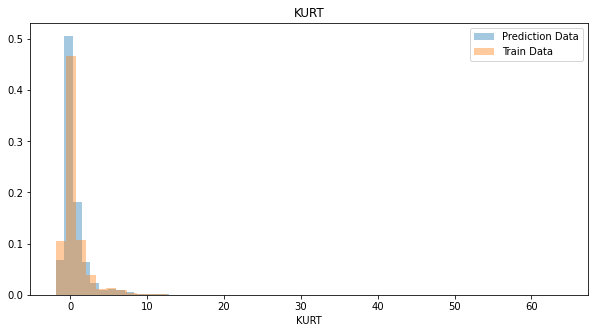

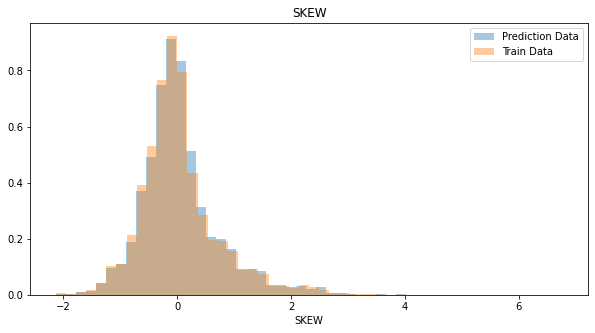

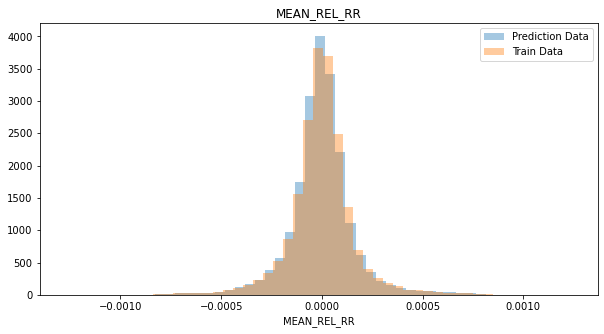

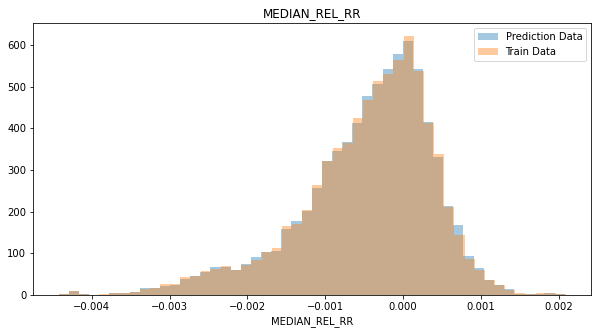

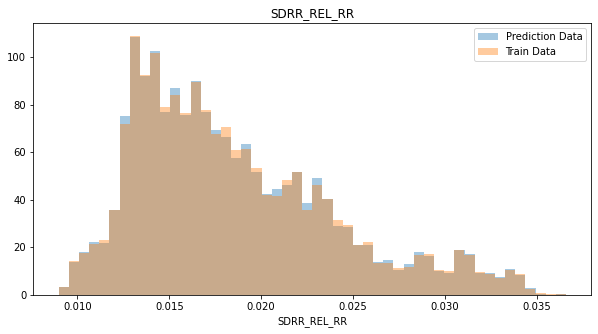

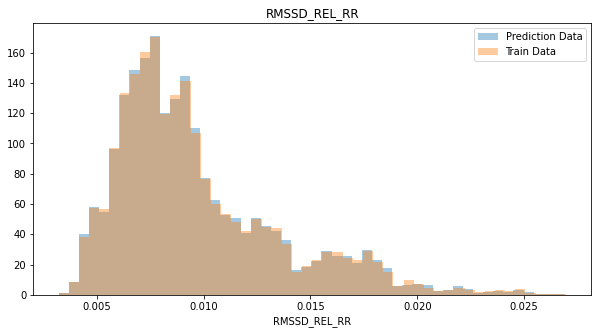

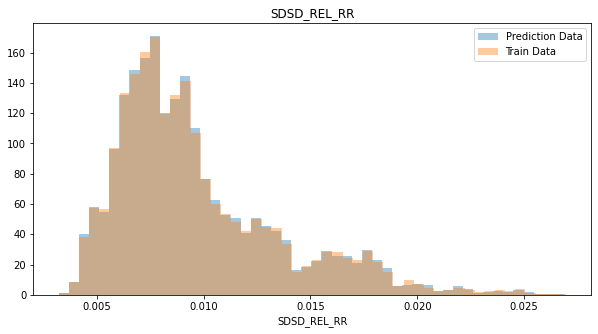

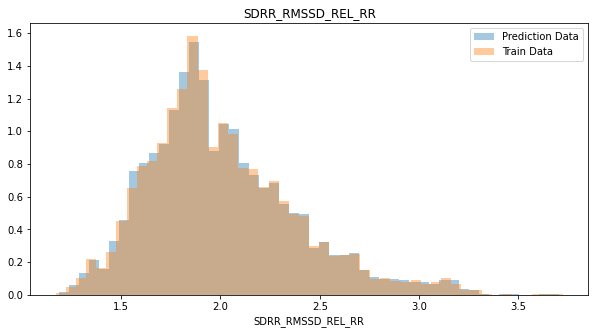

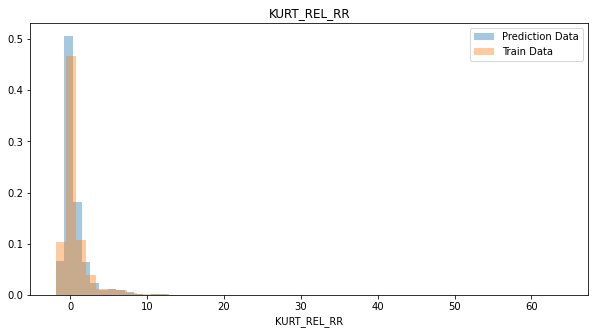

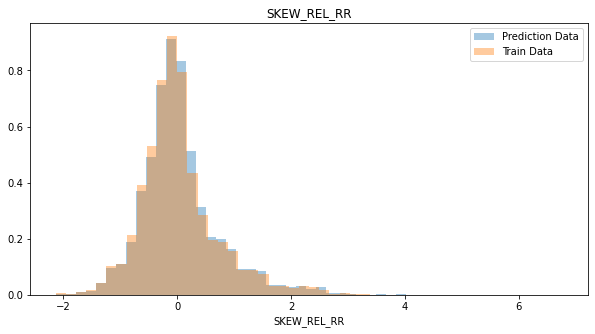

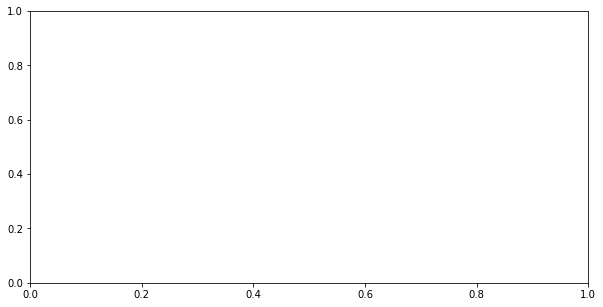

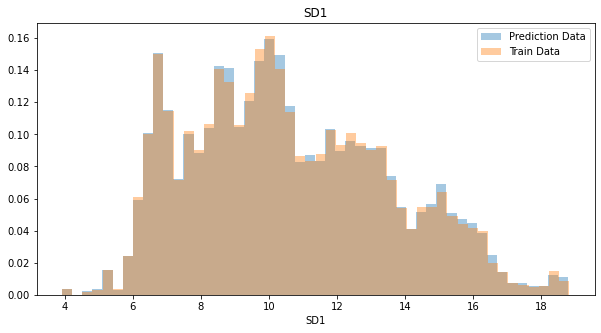

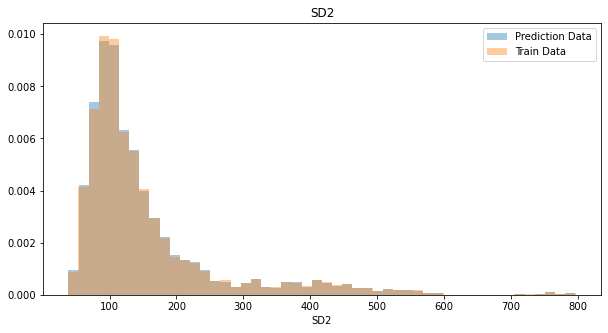

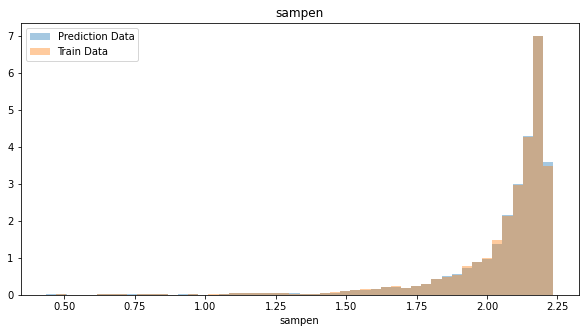

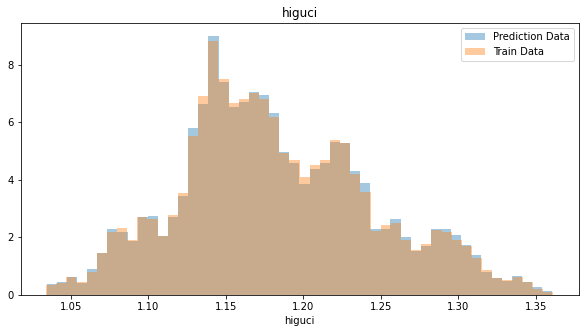

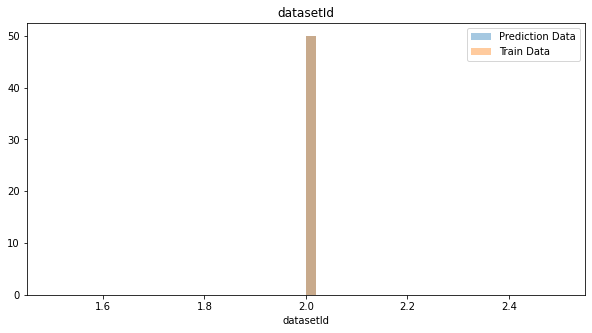

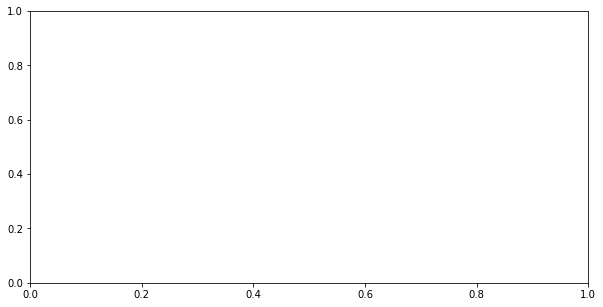

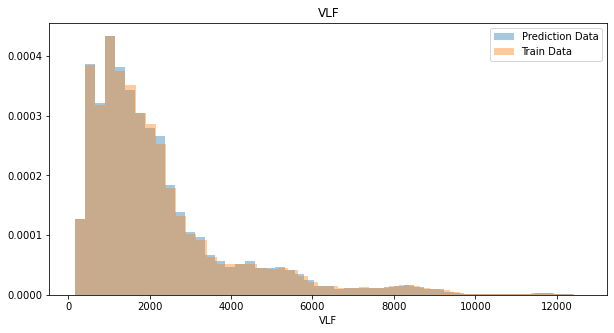

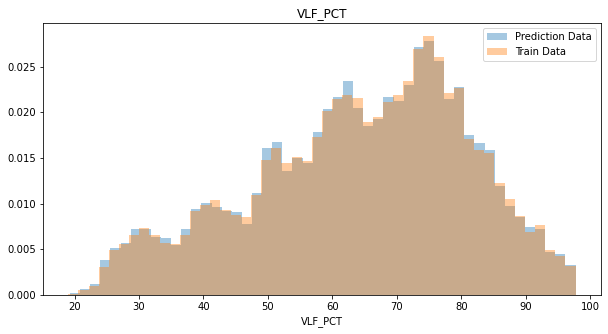

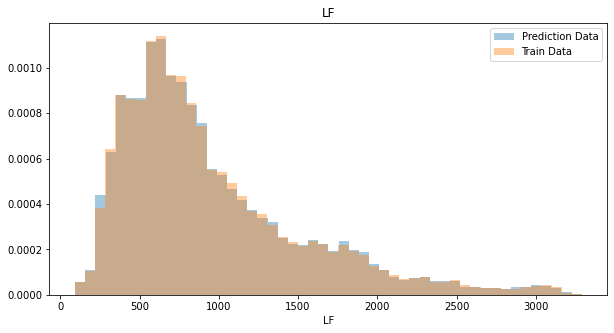

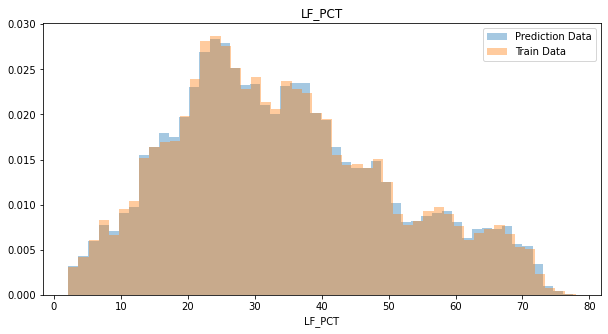

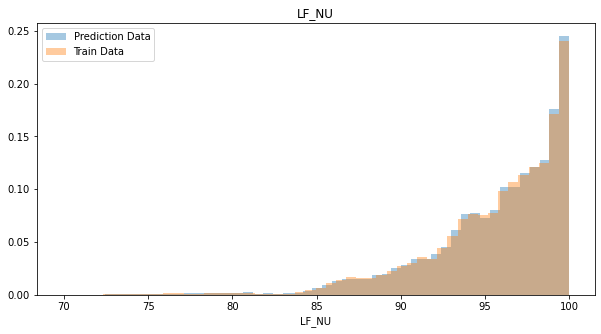

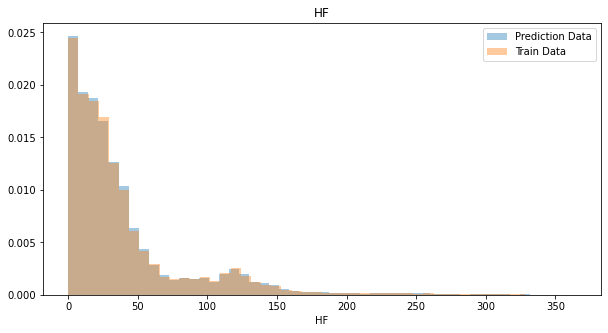

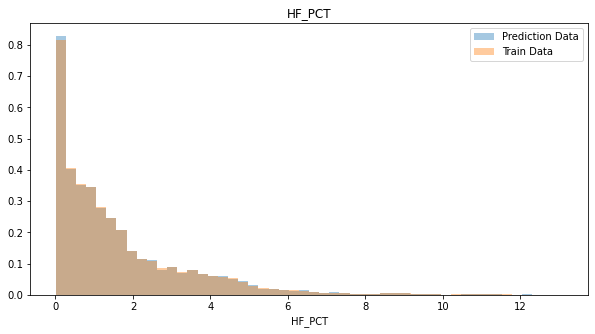

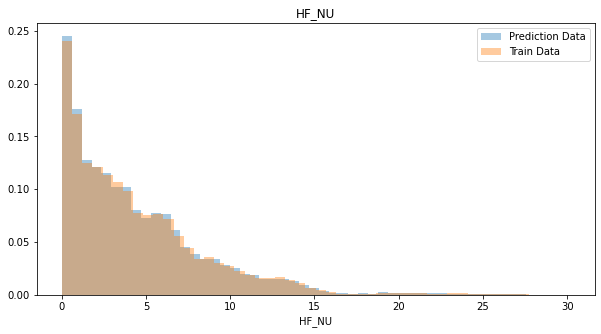

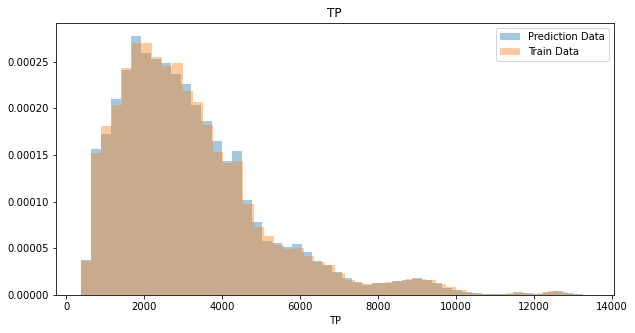

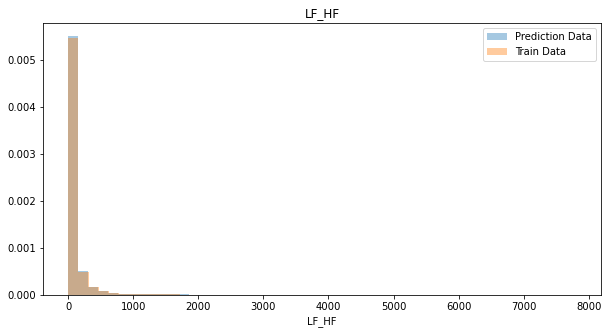

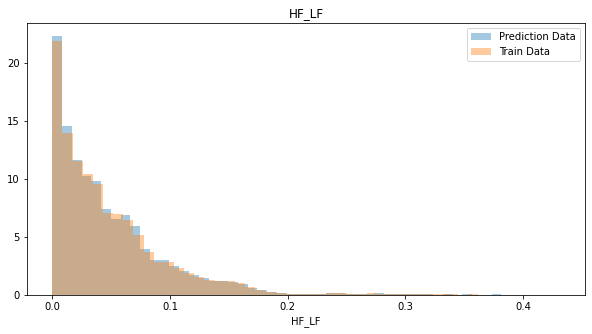

In [50]:
for col in list(df.columns):
    try:
        plt.figure(figsize=(10,5))
        sns.distplot(df_test[col], hist = True, kde = False,
                         kde_kws = {'linewidth': 3},
                         label = 'Prediction Data', norm_hist=True)
        sns.distplot(df[col], hist = True, kde = False,
                         kde_kws = {'linewidth': 3},
                         label = 'Train Data', norm_hist=True)
        
        plt.title(col)
        plt.legend()
        plt.show()
    except:
        pass

In [29]:
df_sum = df.describe()-df_test.describe()
df_sum.T

,count,mean,std,min,25%,50%,75%,max
HF,328256.0,0.233490,4.045883e-01,-1.025835e-03,0.168337,1.870902e-01,2.674201e-01,3.609209
HF_LF,328256.0,0.000245,3.792154e-04,-1.465497e-06,0.000234,1.600127e-04,1.538073e-04,0.016268
HF_NU,328256.0,0.019895,2.123134e-02,-1.465119e-04,0.022787,1.494733e-02,1.349011e-02,0.803502
HF_PCT,328256.0,0.004717,1.036356e-02,-6.091833e-05,0.008557,5.411167e-03,8.055013e-03,0.007888
HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KURT,328256.0,0.002516,-1.559013e-03,1.026687e-05,-0.000257,1.092965e-03,1.152097e-02,9.437452
KURT_REL_RR,328256.0,0.002516,-1.559013e-03,1.026687e-05,-0.000257,1.092965e-03,1.152097e-02,9.437452
LF,328256.0,-2.321596,-3.241762e+00,-2.615422e+00,0.760798,-7.362026e-01,-8.844727e+00,1.454354
LF_HF,328256.0,-1.204422,-7.184024e+00,-9.098983e-02,-0.033482,-1.332403e-01,-1.539497e+00,88.073250
LF_NU,328256.0,-0.019895,2.123134e-02,-8.035016e-01,-0.013490,-1.494733e-02,-2.278663e-02,0.000147


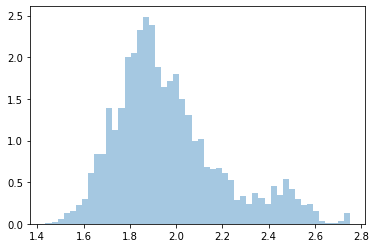

In [57]:
sns.distplot(np.log10(df['SDRR'].values), hist = True, kde = False,
                         kde_kws = {'linewidth': 3},
                         label = 'Train Data', norm_hist=True)

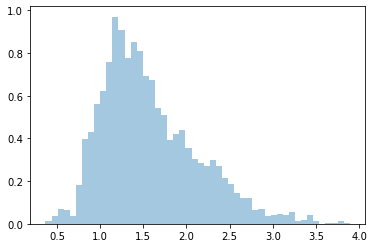

In [58]:
sns.distplot(np.log10(df['LF_HF'].values), hist = True, kde = False,
                         kde_kws = {'linewidth': 3},
                         label = 'Train Data', norm_hist=True)

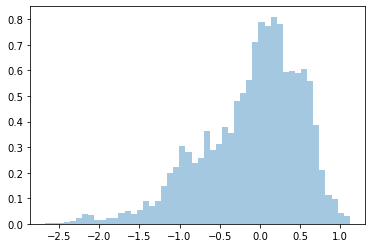

In [60]:
sns.distplot(np.log10(df['HF_PCT'].values), hist = True, kde = False,
                         kde_kws = {'linewidth': 3},
                         label = 'Train Data', norm_hist=True)

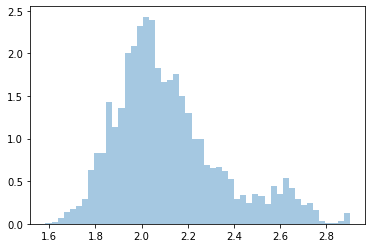

In [61]:
sns.distplot(np.log10(df['SD2'].values), hist = True, kde = False,
                         kde_kws = {'linewidth': 3},
                         label = 'Train Data', norm_hist=True)

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


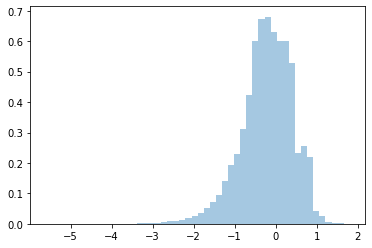

In [62]:
sns.distplot(np.log10(df['KURT'].values), hist = True, kde = False,
                         kde_kws = {'linewidth': 3},
                         label = 'Train Data', norm_hist=True)